In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

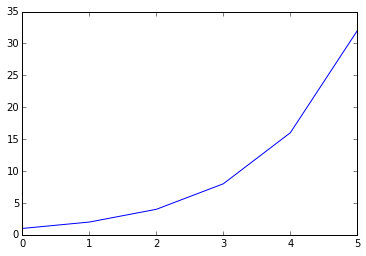

In [2]:
x = np.array([1, 2, 4, 8, 16, 32], dtype=np.float)
plt.plot(x)

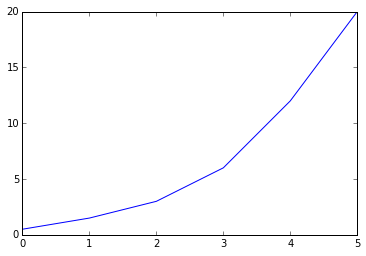

In [3]:
np.gradient(x)
plt.plot(np.gradient(x))

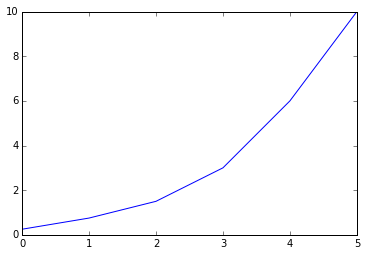

In [4]:
np.gradient(x, 2)
plt.plot(np.gradient(x, 2))

In [5]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

ctc = CellTypesCache()
data_set = ctc.get_ephys_data(464212183)

In [6]:
sweep_number = 35
sweep_data = data_set.get_sweep(sweep_number)

In [7]:
i = sweep_data["stimulus"] # in A
v = sweep_data["response"] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV
sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(len(v)) / sampling_rate

[<matplotlib.text.Text at 0x147269e8>, <matplotlib.text.Text at 0x143664a8>]

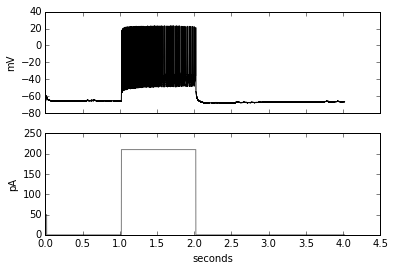

In [8]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set(ylabel="mV")
axes[1].set(ylabel="pA", xlabel="seconds")

In [9]:
def get_sweep_v_i_t_from_set(data_set, sweep_number):
    """Given an NwbDataSet and a sweep number, return a tuple containing
    (response, stimulus, time_values).
    """
    sweep_data = data_set.get_sweep(sweep_number)
    i = sweep_data["stimulus"] # in A
    v = sweep_data["response"] # in V
    i *= 1e12 # to pA
    v *= 1e3 # to mV
    sampling_rate = sweep_data["sampling_rate"] # in Hz
    t = np.arange(len(v)) / sampling_rate
    return v, i, t

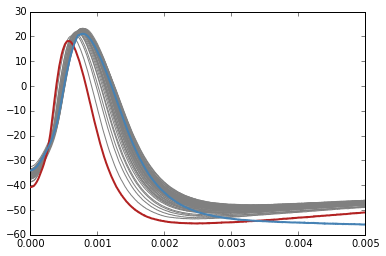

In [10]:
sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1, end=2)
sweep_ext.process_spikes()
features = ctc.get_ephys_features()
data_set = ctc.get_ephys_data(464212183)
sweep = 35
v, i, t = get_sweep_v_i_t_from_set(data_set, sweep)

dt = t[1] - t[0]
window = 0.005 # seconds
n_window_points = int(window / dt)

sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=2.02)
sweep_ext.process_spikes()

fig, ax = plt.subplots(1, 1)
threshold_indexes = sweep_ext.spike_feature("threshold_index").astype(int)
for count, spike_index in enumerate(threshold_indexes):
    if count == 0:
        color, zorder, linewidth = ("firebrick", 20, 2)
    elif count == len(threshold_indexes) - 1:
        color, zorder, linewidth = ("steelblue", 20, 2)
    else:
        color, zorder, linewidth = ("gray", 0, 1)

    ax.plot(t[0:n_window_points], v[spike_index:spike_index + n_window_points], color=color, zorder=zorder, linewidth=linewidth)

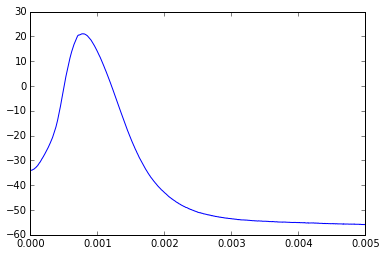

In [11]:
plt.plot(t[0:n_window_points],v[spike_index:spike_index + n_window_points])

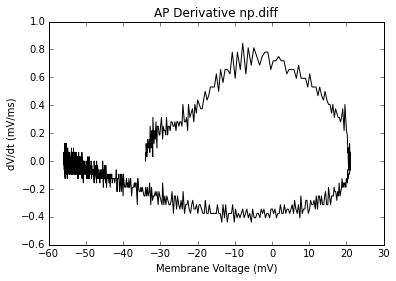

In [15]:
new_array = v[spike_index:spike_index + n_window_points]
dx = np.diff(new_array)
plt.plot(new_array[:-1],dx,color = 'black')
plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('dV/dt (mV/ms)')
plt.title('AP Derivative np.diff')

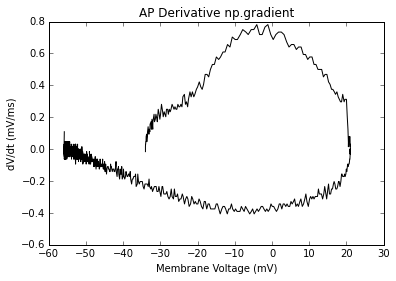

In [16]:
voltage = v[spike_index:spike_index + n_window_points]
dv = np.gradient(voltage)
plt.plot(new_array,dv,color = 'black')
plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('dV/dt (mV/ms)')
plt.title('AP Derivative np.gradient')


In [20]:
sampling_rate

200000.0

In [19]:
new_array

array([-34.03125   , -34.03125   , -34.        , -33.96875   ,
       -33.9375    , -33.875     , -33.84375381, -33.71875   ,
       -33.65625   , -33.625     , -33.53125381, -33.46875   ,
       -33.3125    , -33.1875    , -33.09375   , -33.        ,
       -32.84375   , -32.78125   , -32.53125   , -32.4375    ,
       -32.28125   , -32.0625    , -32.03125   , -31.71875   ,
       -31.59375191, -31.37500191, -31.21875   , -30.9375    ,
       -30.84375191, -30.59375191, -30.34375   , -30.15625191,
       -29.96875191, -29.71875191, -29.40625191, -29.25000191,
       -29.00000191, -28.78125   , -28.56250191, -28.375     ,
       -28.0625    , -27.875     , -27.625     , -27.37500191,
       -27.15625   , -26.875     , -26.59375   , -26.34375   ,
       -26.09375191, -25.81250191, -25.59375   , -25.3125    ,
       -25.03125   , -24.78125191, -24.50000191, -24.21875191,
       -23.96875   , -23.5625    , -23.28125   , -23.        ,
       -22.6875    , -22.46875191, -22.0625    , -21.75

In [17]:
import scipy.signal as signal
N = 4
Wn = 0.1
B,A = signal.butter(N, Wn, output = 'ba')

dv_f = signal.filtfilt(B,A,dv)

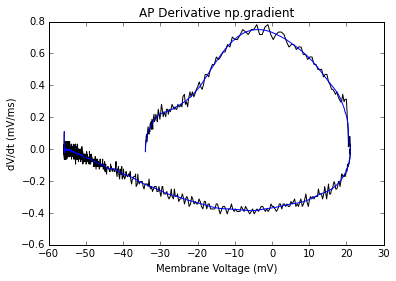

In [18]:
plt.plot(new_array,dv,color = 'black')
plt.plot(new_array,dv_f,color = 'blue')
plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('dV/dt (mV/ms)')
plt.title('AP Derivative np.gradient')

In [124]:
signal.butter?